Cat vs Dog Image Classifier

In [1]:
copy "C:\Users\Asus\OneDrive\Desktop\Bharat Intern Data Science\Cat-Dog-Image-Classifier\kaggle.json" C:\Users\Asus\.kaggle


        1 file(s) copied.


Data Set Downloading

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!kaggle datasets list

ref                                                        title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                         Vehicle Sales Data                               19MB  2024-02-21 20:16:17           8963        153  1.0              
arnavvvvv/netflix-movies-and-tv-shows                      Netflix Movies and TV Shows                       1MB  2024-03-04 15:49:29           1519         41  1.0              
tarunrm09/climate-change-indicators                        Climate change Indicators                        34KB  2024-02-22 08:53:54           4545        102  1.0              
ayushchandramaurya/credit-card-spendings                   Credit Card Spendings                         

Importing the Nessessary libraries

In [4]:
import numpy as np
import os
import sys
import cv2
import matplotlib.pyplot as plt
import pickle
import random
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D
import pickle

import matplotlib.pyplot as plt
%matplotlib inline


from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

UnZipping the File and Loading the Data into a DataFrame

In [5]:
import zipfile
import os

zip_file_path = r'C:\Users\Asus\OneDrive\Desktop\Bharat Intern Data Science\Cat-Dog-Image-Classifier\dogs-vs-cats.zip'
extracted_dir_path = r'C:\Users\Asus\OneDrive\Desktop\Bharat Intern Data Science\Cat-Dog-Image-Classifier'

# Check if the target directory already exists
if os.path.exists(extracted_dir_path):
    print(f"The target directory '{extracted_dir_path}' already exists. Terminating the process.")
else:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir_path)

    print(f"ZIP file '{zip_file_path}' has been successfully extracted to '{extracted_dir_path}'.")


The target directory 'C:\Users\Asus\OneDrive\Desktop\Bharat Intern Data Science\Cat-Dog-Image-Classifier' already exists. Terminating the process.


Creating Train and Test Batches and setting images Re-Size

In [6]:
from tensorflow import keras

# Training Data Generator
train_ds = keras.utils.image_dataset_from_directory(
    directory='C:\\Users\\Asus\\OneDrive\\Desktop\\Bharat Intern Data Science\\Cat-Dog-Image-Classifier\\train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)
)

# Validation Data Generator
validation_ds = keras.utils.image_dataset_from_directory(
    directory='C:\\Users\\Asus\\OneDrive\\Desktop\\Bharat Intern Data Science\\Cat-Dog-Image-Classifier\\test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalize function

In [7]:
import tensorflow as tf

# Normalize function
def process(image, label):
    image = tf.cast(image / 224.0, tf.float32)
    return image, label

# Apply normalization to training dataset
train_ds = train_ds.map(process)

# Apply normalization to validation dataset
validation_ds = validation_ds.map(process)


In [8]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define a simplified CNN model with dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Add dropout for regularization
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)       

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with augmented data and early stopping
history = model.fit(train_ds, validation_data=validation_ds, epochs=20, callbacks=[early_stopping])

Epoch 1/20


625/625 [==============================] - 308s 491ms/step - loss: 0.7482 - accuracy: 0.6245 - val_loss: 0.6151 - val_accuracy: 0.6756
Epoch 2/20
625/625 [==============================] - 301s 482ms/step - loss: 0.5564 - accuracy: 0.7194 - val_loss: 0.5053 - val_accuracy: 0.7640
Epoch 3/20
625/625 [==============================] - 302s 483ms/step - loss: 0.4711 - accuracy: 0.7783 - val_loss: 0.4873 - val_accuracy: 0.7762
Epoch 4/20
625/625 [==============================] - 302s 483ms/step - loss: 0.3973 - accuracy: 0.8185 - val_loss: 0.4917 - val_accuracy: 0.7808
Epoch 5/20
625/625 [==============================] - 302s 483ms/step - loss: 0.3314 - accuracy: 0.8557 - val_loss: 0.5287 - val_accuracy: 0.7682
Epoch 6/20
625/625 [==============================] - 301s 482ms/step - loss: 0.2662 - accuracy: 0.8864 - val_loss: 0.5777 - val_accuracy: 0.7772


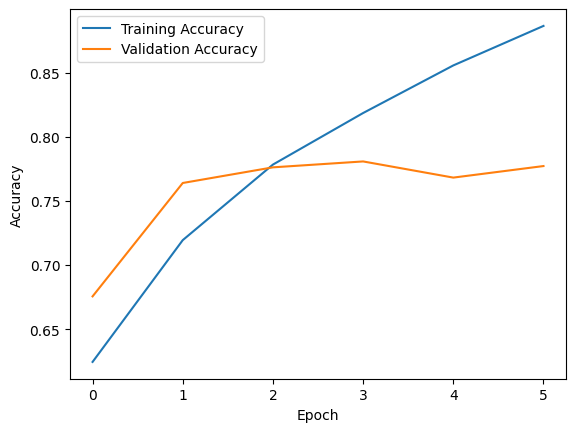

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
import cv2

In [61]:
test_image = cv2.imread('C:\\Users\\Asus\\OneDrive\\Desktop\\R (1).jpeg')


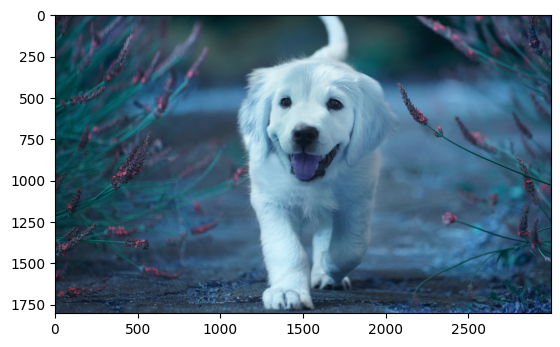

In [62]:
plt.imshow(test_image)

In [63]:
test_image.shape

(1802, 3000, 3)

In [64]:
test_image = cv2.resize(test_image,(224,224))

In [65]:
test_input = test_image.reshape(1, 224, 224, 3)

In [75]:
model.predict(test_input)

# Interpret the predictions
class_names = ['Cat', 'Dog']
predicted_class = class_names[int(predictions[0, 0] > 0.5)]

# Print the result
print(f'The model predicts that the image is a {predicted_class}.')

1/1 [==============================] - 0s 20ms/step
The model predicts that the image is a Dog.
